In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from pathlib import Path
import seaborn as sns
import cv2
import random

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
brain_tumor_dir = r'C:\Users\DELL\Desktop\python project\Deep Learning\BrainTumor Detection\Tumor Detection\Brain Tumor\Brain Tumor'

In [4]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(brain_tumor_dir).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [5]:
def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    compressed_img = cv2.imread(temp_filename)

    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff

In [6]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [7]:
def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')
        
    items = list(items)
        
    p = random.choice(items)
    return p.as_posix()

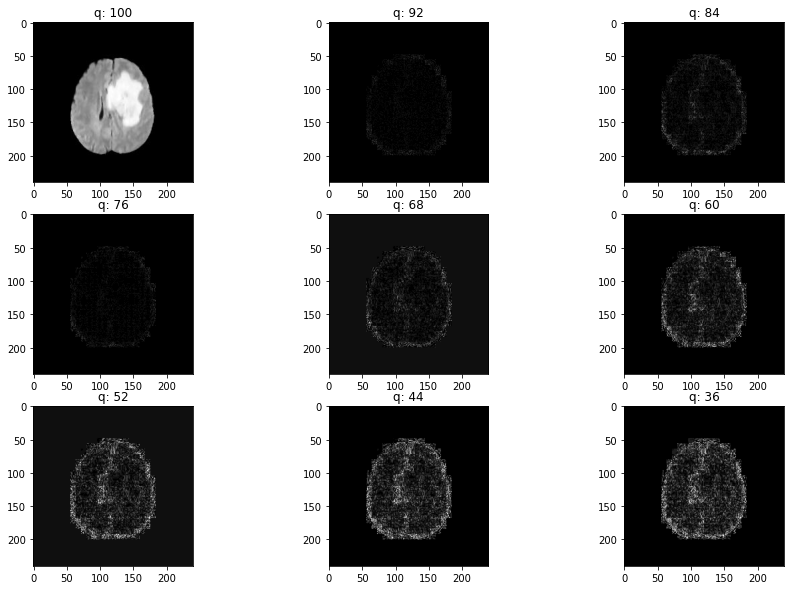

In [8]:
p = random_sample(r'C:\Users\DELL\Desktop\python project\Deep Learning\BrainTumor Detection\Tumor Detection\Brain Tumor\Brain Tumor')
orig = cv2.imread(p)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 8
    img = compute_ela_cv(path=p, quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i) 
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()